# **1️⃣3️⃣ Gradient-Based Optimization Algorithms: Trade-Offs Between SGD, Adam, and RMSprop 🤖🚀🔥**

When training deep learning models, selecting the right gradient-based optimizer can make a huge difference in convergence speed, stability, and overall performance. Let’s dive into the trade-offs between **Stochastic Gradient Descent (SGD)**, **Adam (Adaptive Moment Estimation)**, and **RMSprop (Root Mean Square Propagation)** using a blend of mathematical insights, real-life sports analogies, and practical Python code examples! ⚽🏀♠️

## **💡 Real-Life Analogy: Coaching Strategies in Sports 🏆**

- **SGD (Stochastic Gradient Descent)** is like a **traditional coach** who makes gradual, consistent adjustments based solely on recent game outcomes.  
  - **Pros:** Simple, steady, and can lead to good generalization if tuned well.  
  - **Cons:** May take longer to converge and can get stuck in local minima without extra tricks (like momentum).  

- **Adam (Adaptive Moment Estimation)** is like a **modern coach** who uses both past performance trends and the current game situation to make rapid adjustments.  
  - **Pros:** Fast convergence and adaptive learning rates for each parameter; great for noisy or sparse data.  
  - **Cons:** Sometimes it might overfit or lead to less generalizable models, and it uses more memory.  

- **RMSprop (Root Mean Square Propagation)** is like a **specialist coach** who focuses on stabilizing performance by monitoring the variability of players’ performance over time.  
  - **Pros:** Particularly effective for non-stationary problems (e.g., time-series data or recurrent networks).  
  - **Cons:** Requires careful tuning of its decay parameter $γ$ and can be less robust than Adam in some scenarios.

## **📌 Mathematical Trade-Offs**

### **Stochastic Gradient Descent (SGD)**

- **Update Rule**:  
  $$
  \theta \leftarrow \theta - \alpha \nabla_\theta L(\theta)
  $$
  - $\alpha$ is the learning rate.

- **Pros**:  
  - Simple implementation.  
  - Low memory usage.  

- **Cons**:  
  - Sensitive to learning rate selection.  
  - Convergence can be slow and noisy without momentum.

### **Adam**

- **Update Rule**:  
  Adam computes adaptive learning rates using:
  $$
  m_t = \beta_1 m_{t-1} + (1-\beta_1) \nabla_\theta L(\theta)
  $$
  $$
  v_t = \beta_2 v_{t-1} + (1-\beta_2) (\nabla_\theta L(\theta))^2
  $$
  $$
  \hat{m}_t = \frac{m_t}{1-\beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1-\beta_2^t}
  $$
  $$
  \theta \leftarrow \theta - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
  $$

- **Pros**:  
  - Fast convergence due to adaptive learning rates.  
  - Robust to sparse gradients.  

- **Cons**:  
  - Uses more memory.  
  - Sometimes might lead to overfitting or suboptimal generalization.

### **RMSprop**

- **Update Rule**:  
  RMSprop maintains a running average of squared gradients:
  $$
  E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)(\nabla_\theta L(\theta))^2
  $$
  $$
  \theta \leftarrow \theta - \alpha \frac{\nabla_\theta L(\theta)}{\sqrt{E[g^2]_t} + \epsilon}
  $$

- **Pros**:  
  - Well-suited for recurrent neural networks and non-stationary objectives.  

- **Cons**:  
  - Requires careful tuning of its decay parameter $\gamma$.  
  - May not be as robust as Adam for some complex tasks.

## **📊 Python Code: Comparing SGD, Adam, and RMSprop on Synthetic Sports Data 🏀⚽**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# Set seeds for reproducibility 🔒
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
# Generate synthetic sports data (e.g., predicting points per game)
# Let's assume a simple linear relationship: points = 3 * X + noise
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze() + np.random.randn(100) * 2  # Linear relation with noise

In [3]:
def build_model(optimizer):
    model = Sequential([
        Dense(10, activation='relu', input_shape=(1,)),
        Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mse')
    return model

In [4]:
# Define optimizers with a fixed learning rate for fair comparison
optimizers_dict = {
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'Adam': Adam(learning_rate=0.01),
    'RMSprop': RMSprop(learning_rate=0.01)
}

In [5]:
history_dict = {}

# Train a model with each optimizer
for opt_name, opt in optimizers_dict.items():
    print(f"Training with {opt_name} optimizer ⚡")
    model = build_model(opt)
    history = model.fit(X, y, epochs=100, batch_size=8, verbose=0)
    history_dict[opt_name] = history.history['loss']

Training with SGD optimizer ⚡


/Users/Oks_WORKSPACE/Desktop/DEV/MLX_Interview_Notes/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with Adam optimizer ⚡
Training with RMSprop optimizer ⚡


/Users/Oks_WORKSPACE/Desktop/DEV/MLX_Interview_Notes/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


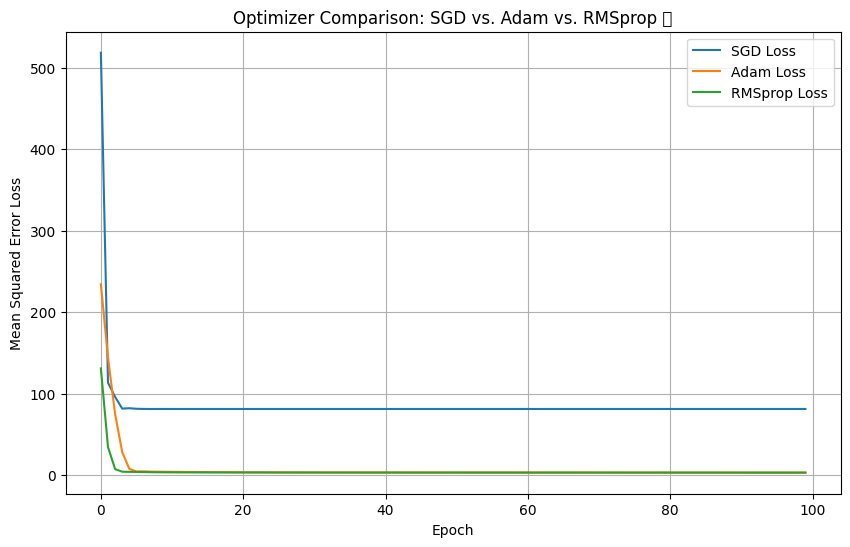

In [6]:
# Plot the training loss curves
plt.figure(figsize=(10,6))
for opt_name, loss_history in history_dict.items():
    plt.plot(loss_history, label=f"{opt_name} Loss")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error Loss")
plt.title("Optimizer Comparison: SGD vs. Adam vs. RMSprop 🚀")
plt.legend()
plt.grid(True)
plt.show()

### **Interpreting the Results:**

- **SGD**: May show a **slower decrease** in loss and more oscillations if not finely tuned.
- **Adam**: Typically converges **faster and smoother** due to adaptive learning rates.
- **RMSprop**: Often similar to Adam but may require extra tuning of decay parameters.

## **🔥 Final Takeaways**

- **SGD** is simple and efficient but requires **careful tuning** and can converge slowly. ⏳🚶‍♂️  
- **Adam** offers **fast convergence** and adapts learning rates automatically, but may use more memory and occasionally overfit. 🚀💡  
- **RMSprop** strikes a balance for **non-stationary or sequential data** but can be sensitive to its decay hyperparameter. 🎢🤹‍♀️  
- **The choice** depends on your specific task, data complexity, and computational resources—just as a coach might choose different training strategies based on the game plan. 🏆⚽🏀